**Общая информация**

**Срок сдачи:** 29 марта 2021, 08:30 

**Штраф за опоздание:** по 1 баллу за 24 часа задержки. Через 5 дней домашнее задание сгорает.

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий на почту ml1.sphere@mail.ru с указанием темы в следующем формате:

[ML0220, Задание 1] Фамилия Имя.

Используйте данный Ipython Notebook при оформлении домашнего задания.


**Штрафные баллы:**

1. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw1.ipynb) -0.5 баллов
2. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -0.5 баллов


In [1]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn import datasets
from sklearn.base import BaseEstimator
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KDTree
from sklearn.metrics import accuracy_score
import scipy as scp

In [2]:
from sklearn.datasets import fetch_20newsgroups

##### Задание 1 (1 балл)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)
Разберитесь самостоятельно, какая мера расстояния используется в KNeighborsClassifier дефолтно и реализуйте свой алгоритм именно с этой мерой. 
Для подсчета расстояний можно использовать функции [отсюда](https://docs.scipy.org/doc/scipy/reference/spatial.distance.html)

In [3]:
def mostpopular(neighbors):
        return np.argmax(np.bincount(neighbors))

    
class MyKNeighborsClassifier(BaseEstimator):
    
    def __init__(self, n_neighbors, algorithm='brute'):
        self.n_neighbors = n_neighbors
        self.algorithm = algorithm
    
    def fit(self, X, y):
        self.X = X
        self.y = y
    
    def predict(self, X):
        if(self.algorithm == 'brute'):
            dist = scp.spatial.distance.cdist(X, self.X, metric = "minkowski")
            k_neighbors_indices = np.argpartition(dist, self.n_neighbors, axis=1)
            k_neighbors_indices = k_neighbors_indices[:,:self.n_neighbors]
        if(self.algorithm == 'kd_tree'):
            tree = KDTree(self.X)
            dist, k_neighbors_indices = tree.query(X, k = self.n_neighbors)
        k_neighbors = self.y[k_neighbors_indices]
        answer = np.apply_along_axis(mostpopular, axis=1, arr=k_neighbors)
        return answer
            
            

**IRIS**

В библиотеке scikit-learn есть несколько датасетов из коробки. Один из них [Ирисы Фишера](https://ru.wikipedia.org/wiki/%D0%98%D1%80%D0%B8%D1%81%D1%8B_%D0%A4%D0%B8%D1%88%D0%B5%D1%80%D0%B0)

In [4]:
iris = datasets.load_iris()

In [5]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [6]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='brute')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='brute')

In [7]:
clf.fit(X_train, y_train)
my_clf.fit(X_train, y_train)

In [8]:
my_clf_pred = my_clf.predict(X_test)

In [9]:
sklearn_pred = clf.predict(X_test)
my_clf_pred = my_clf.predict(X_test)
assert abs( accuracy_score(y_test, my_clf_pred) -  accuracy_score(y_test, sklearn_pred ) )<0.005, "Score must be simillar"

**Задание 2 (0.5 балла)**

Давайте попробуем добиться скорости работы на fit, predict сравнимой со sklearn для iris. Допускается замедление не более чем в 2 раза. 
Для этого используем numpy. 

In [10]:
%time clf.fit(X_train, y_train)

CPU times: user 756 µs, sys: 791 µs, total: 1.55 ms
Wall time: 1.18 ms


KNeighborsClassifier(algorithm='brute', n_neighbors=2)

In [11]:
%time my_clf.fit(X_train, y_train)

CPU times: user 2 µs, sys: 2 µs, total: 4 µs
Wall time: 6.68 µs


In [12]:
%time clf.predict(X_test)

CPU times: user 4.02 ms, sys: 712 µs, total: 4.73 ms
Wall time: 3.18 ms


array([0, 2, 2, 1, 0, 2, 1, 2, 1, 1, 2, 0, 0, 0, 1])

In [13]:
%time my_clf.predict(X_test)

CPU times: user 1.19 ms, sys: 1.22 ms, total: 2.42 ms
Wall time: 1.51 ms


array([0, 2, 2, 1, 0, 2, 1, 2, 1, 1, 2, 0, 0, 0, 1])

###### Задание 3 (1 балл)
Добавьте algorithm='kd_tree' в реализацию KNN (использовать KDTree из sklearn.neighbors). Необходимо добиться скорости работы на fit,  predict сравнимой со sklearn для iris. Допускается замедление не более чем в 2 раза. 
Для этого используем numpy. Точность не должна уступать значению KNN из sklearn. 

In [14]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')

In [15]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [16]:
%time clf.fit(X_train, y_train)

CPU times: user 1.57 ms, sys: 430 µs, total: 2 ms
Wall time: 1.48 ms


KNeighborsClassifier(algorithm='kd_tree', n_neighbors=2)

In [17]:
%time my_clf.fit(X_train, y_train)

CPU times: user 5 µs, sys: 4 µs, total: 9 µs
Wall time: 15 µs


In [18]:
%time clf.predict(X_test)

CPU times: user 4.04 ms, sys: 3.84 ms, total: 7.88 ms
Wall time: 6.23 ms


array([2, 2, 1, 2, 1, 2, 0, 0, 1, 0, 1, 0, 0, 1, 2])

In [19]:
%time my_clf.predict(X_test)

CPU times: user 2.87 ms, sys: 0 ns, total: 2.87 ms
Wall time: 2.26 ms


array([2, 2, 1, 2, 1, 2, 0, 0, 1, 0, 1, 0, 0, 1, 2])

In [20]:
sklearn_pred = clf.predict(X_test)
my_clf_pred = my_clf.predict(X_test)
assert abs( accuracy_score(y_test, my_clf_pred) -  accuracy_score(y_test, sklearn_pred ) )<0.005, "Score must be simillar"

**Задание 4 (2.5 балла)**

Рассмотрим новый датасет 20 newsgroups

In [21]:
newsgroups = fetch_20newsgroups(subset='train',remove=['headers','footers', 'quotes'])

In [22]:
data = newsgroups['data']
target = newsgroups['target']

Преобразуйте текстовые данные из data с помощью [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html). Словарь можно ограничить по частотности.

In [23]:
 from sklearn.feature_extraction.text import CountVectorizer
 from sklearn.feature_extraction.text import TfidfVectorizer

In [24]:
vectorizer = TfidfVectorizer(max_features=1000) #TfidVectorizer эффективнее
X = vectorizer.fit_transform(data)
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.4)

*Так мы получили векторное представление наших текстов. Значит можно приступать к задаче обучения модели*

Реализуйте разбиение выборки для кросс-валидации на 3 фолдах. Разрешено использовать sklearn.cross_validation

In [26]:
clf = KNeighborsClassifier(n_neighbors=3, algorithm='brute')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')

In [27]:
scores = cross_val_score(clf, X_train, y_train, cv = 3)
scores.mean()

0.18444227470999988

Напишите метод, позволяющий найти оптимальное количество ближайших соседей(дающее максимальную точность в среднем на валидации на 3 фолдах).
Постройте график зависимости средней точности от количества соседей. Можно рассмотреть число соседей от 1 до 10.

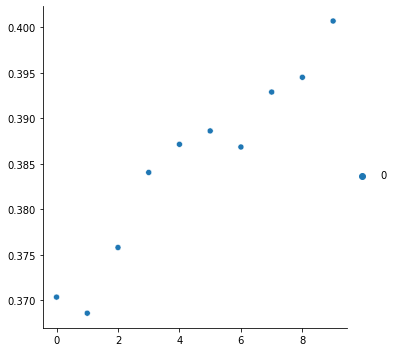

In [28]:
size = 10
arr = np.zeros(size).reshape(size, 1)
for i in range (1, size+1):
    clf = KNeighborsClassifier(n_neighbors=i, metric='cosine')
    scores = cross_val_score(clf, X_train, y_train, cv = 3)
    score = scores.mean()
    arr[i-1] = score
plot = sns.relplot(data = arr)

Как изменится качество на валидации, если:

1. Используется косинусная метрика вместо евклидовой.
2. К текстам применяется TfIdf векторизацию( sklearn.feature_extraction.text.TfidfVectorizer)

Сравните модели, выберите лучшую.

In [ ]:
# k = 9, metric = cosine, vectorizer = TfidfVectorizer

Загрузим  теперь test  часть нашей выборки и преобразуем её аналогично с train частью. Не забудьте, что наборы слов в train и test части могут отличаться.

Оценим точность вашей лучшей модели на test части датасета. Отличается ли оно от кросс-валидации? Попробуйте сделать выводы, почему отличается качество.

In [31]:
newsgroups = fetch_20newsgroups(subset='train',remove=['headers','footers', 'quotes'])
data = newsgroups['data']
target = newsgroups['target']


In [32]:
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(data)
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.2)
clf = KNeighborsClassifier(n_neighbors=10, metric='cosine')
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
accuracy_score(y_test,pred)

0.42996022978347326